In [ ]:
!pip install -U scikit-learn==0.23.1 --user

In [ ]:
!pip3 install opencv-python

In [1]:
# Importing some useful/necessary packages
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score, GridSearchCV

from sklearn.metrics import accuracy_score, log_loss

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


import cv2

%matplotlib inline

In [2]:
leaf=pd.read_csv('leaf_data_uci_updated.csv')

In [3]:
leaf.head(10)

,Eccentricity,Aspect Ratio,Elongation,Solidity,Stochastic Convexity,Isoperimetric Factor,Maximal Indentation Depth,Lobedness,Average Intensity,Average Contrast,Smoothness,Third moment,Uniformity,Entropy
0,0.72694,1.4742,0.32396,0.98535,1.00000,0.83592,0.004657,0.003947,0.047790,0.127950,0.016108,0.005232,0.000275,1.17560
1,0.74173,1.5257,0.36116,0.98152,0.99825,0.79867,0.005242,0.005002,0.024160,0.090476,0.008119,0.002708,0.000075,0.69659
2,0.76722,1.5725,0.38998,0.97755,1.00000,0.80812,0.007457,0.010121,0.011897,0.057445,0.003289,0.000921,0.000038,0.44348
3,0.73797,1.4597,0.35376,0.97566,1.00000,0.81697,0.006877,0.008607,0.015950,0.065491,0.004271,0.001154,0.000066,0.58785
4,0.82301,1.7707,0.44462,0.97698,1.00000,0.75493,0.007428,0.010042,0.007938,0.045339,0.002051,0.000560,0.000023,0.34214
5,0.72997,1.4892,0.34284,0.98755,1.00000,0.84482,0.004945,0.004451,0.010487,0.058528,0.003414,0.001125,0.000025,0.34068
6,0.82063,1.7529,0.44458,0.97964,0.99649,0.76770,0.005928,0.006395,0.018375,0.080587,0.006452,0.002271,0.000041,0.53904
7,0.77982,1.6215,0.39222,0.98512,0.99825,0.80816,0.005099,0.004731,0.024875,0.089686,0.007979,0.002466,0.000147,0.66975
8,0.83089,1.8199,0.45693,0.98240,1.00000,0.77106,0.006006,0.006564,0.007245,0.040616,0.001647,0.000388,0.000033,0.33696
9,0.90631,2.3906,0.58336,0.97683,0.99825,0.66419,0.008402,0.012848,0.007010,0.042347,0.001790,0.000459,0.000028,0.28082


In [102]:
leaf.describe().T 

,count,mean,std,min,25%,50%,75%,max
Eccentricity,340.0,0.719854,0.208311,0.117080,0.550623,0.763450,0.895097,0.998710
Aspect Ratio,340.0,1.902051,0.888783,1.006600,1.211300,1.570750,2.343100,4.040800
Elongation,340.0,0.513760,0.195583,0.107610,0.349623,0.501855,0.633373,0.948340
Solidity,340.0,0.919101,0.075247,0.761323,0.890667,0.948130,0.976897,0.993880
Stochastic Convexity,340.0,0.975867,0.032506,0.915575,0.966230,0.992980,1.000000,1.000000
Isoperimetric Factor,340.0,0.531234,0.217532,0.078376,0.346818,0.579160,0.700713,0.858160
Maximal Indentation Depth,340.0,0.034647,0.031502,0.002837,0.009521,0.023860,0.047834,0.105303
Lobedness,340.0,0.284499,0.365318,0.001464,0.016500,0.103615,0.416432,1.016331
Average Intensity,340.0,0.051209,0.035518,0.005022,0.022843,0.042087,0.073046,0.148349
Average Contrast,340.0,0.124535,0.051860,0.033415,0.083362,0.119375,0.163795,0.280810


In [103]:
sqrt(8)

NameError: name 'sqrt' is not defined

<AxesSubplot:>

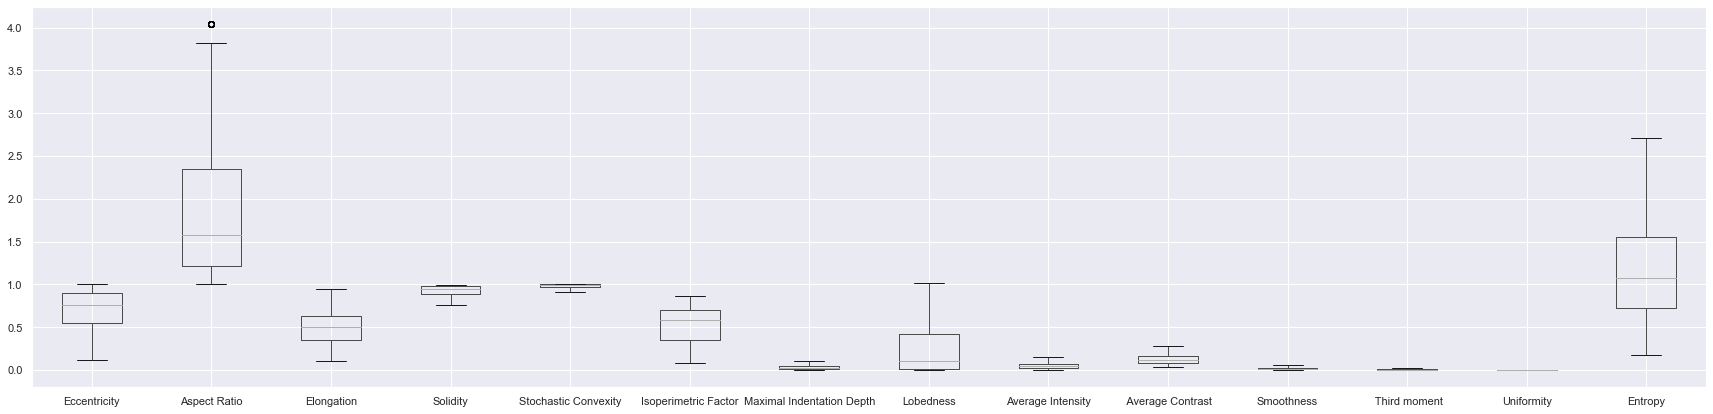

In [5]:
leaf.boxplot(figsize=(30,7))

In [6]:
def outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range
outlier(leaf['Aspect Ratio'])

(-0.4863999999999995, 4.040799999999999)

In [7]:
leaf['Aspect Ratio']>4.040799999999999

0      False
1      False
2      False
3      False
4      False
       ...  
335    False
336    False
337    False
338    False
339    False
Name: Aspect Ratio, Length: 340, dtype: bool

In [16]:
leaf[leaf['Aspect Ratio'] > 4.040799999999999]

,Eccentricity,Aspect Ratio,Elongation,Solidity,Stochastic Convexity,Isoperimetric Factor,Maximal Indentation Depth,Lobedness,Average Intensity,Average Contrast,Smoothness,Third moment,Uniformity,Entropy
70,0.98502,4.0408,0.83612,0.976280,0.987720,0.315460,0.023220,0.098133,0.036830,0.106610,0.011238,0.003291,0.000222,1.01850
71,0.98487,4.0408,0.83628,0.965220,1.000000,0.295090,0.024667,0.110740,0.030300,0.097095,0.009339,0.002783,0.000183,0.85025
72,0.98853,4.0408,0.84928,0.968610,0.977190,0.277170,0.029032,0.153400,0.032722,0.102830,0.010462,0.003339,0.000131,0.94985
73,0.98326,4.0408,0.82878,0.964890,1.000000,0.307770,0.014672,0.039178,0.019278,0.073118,0.005318,0.001466,0.000098,0.66403
74,0.98592,4.0408,0.83884,0.960270,0.968420,0.283450,0.025004,0.113790,0.021226,0.080869,0.006497,0.001957,0.000092,0.64839
75,0.98695,4.0408,0.84124,0.970850,1.000000,0.292880,0.023221,0.098140,0.025859,0.089821,0.008003,0.002492,0.000098,0.81120
76,0.98717,4.0408,0.84726,0.968460,1.000000,0.288990,0.022056,0.088540,0.042124,0.118420,0.013829,0.004382,0.000202,1.09800
77,0.98361,4.0408,0.82847,0.954880,0.984210,0.321340,0.040164,0.293590,0.039243,0.116220,0.013327,0.004387,0.000195,1.00060
78,0.98643,4.0408,0.84737,0.952740,0.915575,0.299820,0.019421,0.068643,0.028986,0.095642,0.009064,0.002753,0.000144,0.82529
79,0.98600,4.0408,0.83942,0.978370,0.992980,0.316070,0.011769,0.025208,0.051048,0.135240,0.017961,0.006018,0.000313,1.16600


In [21]:
leaf.duplicated().sum()

0

In [38]:
leaf.isnull().sum()

Eccentricity                 0
Aspect Ratio                 0
Elongation                   0
Solidity                     0
Stochastic Convexity         0
Isoperimetric Factor         0
Maximal Indentation Depth    0
Lobedness                    0
Average Intensity            0
 Average Contrast            0
Smoothness                   0
 Third moment                0
Uniformity                   0
Entropy                      0
dtype: int64

In [40]:
from scipy.stats import zscore
leaf2=leaf.apply(zscore)
leaf2.head(10)

,Eccentricity,Aspect Ratio,Elongation,Solidity,Stochastic Convexity,Isoperimetric Factor,Maximal Indentation Depth,Lobedness,Average Intensity,Average Contrast,Smoothness,Third moment,Uniformity,Entropy
0,0.034066,-0.482099,-0.971865,0.881718,0.743486,1.402718,-0.953401,-0.769100,-0.096417,0.065951,-0.105019,-0.099339,-0.241076,0.022209
1,0.105170,-0.424069,-0.781384,0.830744,0.689571,1.231226,-0.934782,-0.766208,-0.762703,-0.657718,-0.711617,-0.661808,-0.836779,-0.798023
2,0.227715,-0.371335,-0.633812,0.777907,0.743486,1.274732,-0.864365,-0.752173,-1.108478,-1.295588,-1.078407,-1.060062,-0.946702,-1.231436
3,0.087093,-0.498437,-0.819275,0.752752,0.743486,1.315476,-0.882820,-0.756324,-0.994197,-1.140210,-1.003871,-1.007984,-0.862100,-0.984224
4,0.495931,-0.148005,-0.354030,0.770320,0.743486,1.029856,-0.865297,-0.752390,-1.220111,-1.529370,-1.172391,-1.140460,-0.989599,-1.404965
5,0.048633,-0.465197,-0.875190,0.910999,0.743486,1.443692,-0.944230,-0.767718,-1.148235,-1.274674,-1.068938,-1.014579,-0.985727,-1.407465
6,0.484489,-0.168062,-0.354235,0.805723,0.635348,1.088646,-0.912986,-0.762387,-0.925820,-0.848687,-0.838213,-0.759114,-0.935978,-1.067804
7,0.288291,-0.316122,-0.622342,0.878657,0.689571,1.274917,-0.939347,-0.766948,-0.742542,-0.672974,-0.722255,-0.715642,-0.622413,-0.843982
8,0.533815,-0.092567,-0.290998,0.842456,0.743486,1.104115,-0.910519,-0.761924,-1.239657,-1.620577,-1.203106,-1.178728,-0.961597,-1.413835
9,0.896403,0.550494,0.356382,0.768324,0.689571,0.612106,-0.834336,-0.744698,-1.246286,-1.587149,-1.192232,-1.162959,-0.975300,-1.509966


In [42]:
leaf2.std()

Eccentricity                 1.001474
Aspect Ratio                 1.001474
Elongation                   1.001474
Solidity                     1.001474
Stochastic Convexity         1.001474
Isoperimetric Factor         1.001474
Maximal Indentation Depth    1.001474
Lobedness                    1.001474
Average Intensity            1.001474
 Average Contrast            1.001474
Smoothness                   1.001474
 Third moment                1.001474
Uniformity                   1.001474
Entropy                      1.001474
dtype: float64

In [45]:
leaf2.mean()

Eccentricity                -4.898043e-17
Aspect Ratio                -9.959354e-17
Elongation                   6.269495e-17
Solidity                    -1.256511e-15
Stochastic Convexity        -5.440093e-15
Isoperimetric Factor        -5.694791e-16
Maximal Indentation Depth   -8.620555e-17
Lobedness                    9.404242e-17
Average Intensity           -5.322540e-17
 Average Contrast           -1.280022e-16
Smoothness                   6.726645e-17
 Third moment               -2.155139e-17
Uniformity                   1.718805e-16
Entropy                      1.857991e-16
dtype: float64

<AxesSubplot:>

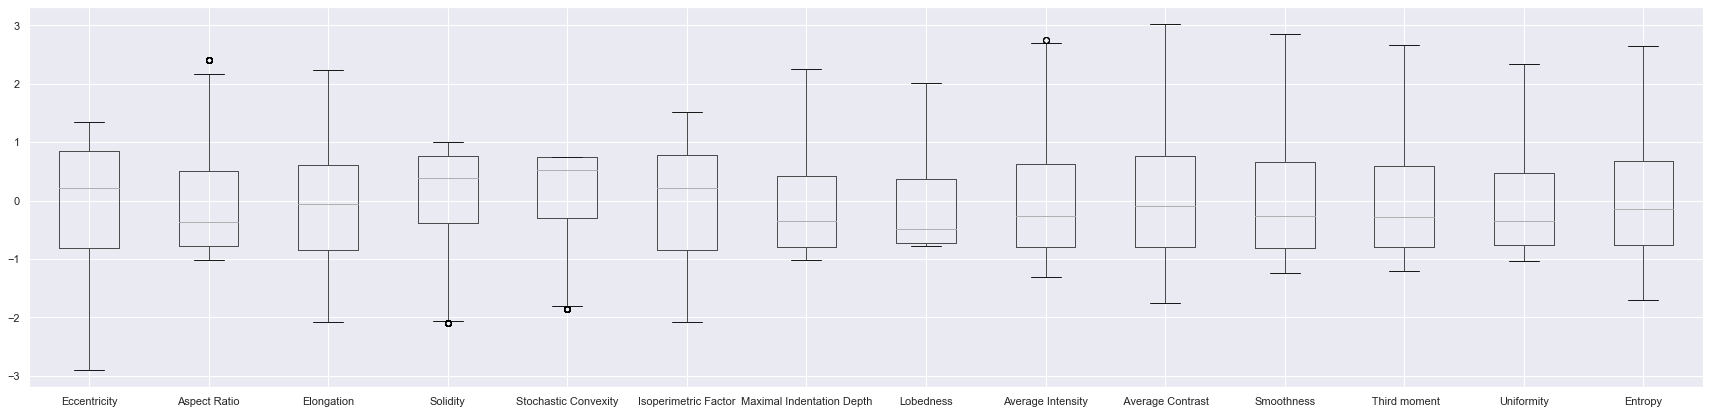

In [86]:
leaf2.boxplot(figsize=(30,7))

In [87]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [89]:
wardlink = linkage(leaf2, method = 'ward')

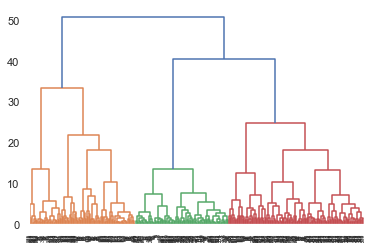

In [90]:
dend = dendrogram(wardlink)

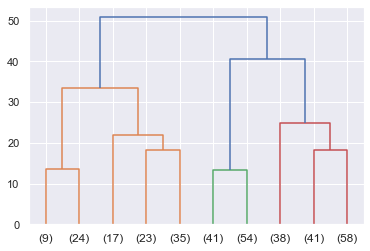

In [100]:
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10,
                 )

In [101]:
print('Cluster 1 has', 9+24+17+23+35, 'records')
print('')
print('Cluster 2 has', 41+54, 'records')
print('')
print('Cluster 3 has', 38+41+58, 'records')

Cluster 1 has 108 records

Cluster 2 has 95 records

Cluster 3 has 137 records


In [92]:
from scipy.cluster.hierarchy import fcluster

In [93]:
#Method 1

clusters = fcluster(wardlink, 3, criterion='maxclust')
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,
       3, 2, 3, 2, 3, 3, 3, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3,
       2, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 2, 3, 2, 2, 3, 3, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 1,
       1, 3, 3, 2, 3, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 3, 2, 2, 2,
       2, 3, 2, 2, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 2,
       2, 2, 3, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 2, 3, 2, 3, 3, 2, 2, 2, 2, 2, 3, 3, 3, 2,

In [95]:
# Method 2

clusters = fcluster(wardlink, 35, criterion='distance')
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,
       3, 2, 3, 2, 3, 3, 3, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3,
       2, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 2, 3, 2, 2, 3, 3, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 1,
       1, 3, 3, 2, 3, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 3, 2, 2, 2,
       2, 3, 2, 2, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 2,
       2, 2, 3, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 2, 3, 2, 3, 3, 2, 2, 2, 2, 2, 3, 3, 3, 2,

In [96]:
leaf['clusters'] = clusters

In [98]:
leaf.head()

,Eccentricity,Aspect Ratio,Elongation,Solidity,Stochastic Convexity,Isoperimetric Factor,Maximal Indentation Depth,Lobedness,Average Intensity,Average Contrast,Smoothness,Third moment,Uniformity,Entropy,Clus_kmeans,sil_width,clusters
0,0.72694,1.4742,0.32396,0.98535,1.00000,0.83592,0.004657,0.003947,0.047790,0.127950,0.016108,0.005232,0.000275,1.17560,0,0.309653,2
1,0.74173,1.5257,0.36116,0.98152,0.99825,0.79867,0.005242,0.005002,0.024160,0.090476,0.008119,0.002708,0.000075,0.69659,0,0.530817,2
2,0.76722,1.5725,0.38998,0.97755,1.00000,0.80812,0.007457,0.010121,0.011897,0.057445,0.003289,0.000921,0.000038,0.44348,0,0.547833,2
3,0.73797,1.4597,0.35376,0.97566,1.00000,0.81697,0.006877,0.008607,0.015950,0.065491,0.004271,0.001154,0.000066,0.58785,0,0.541172,2
4,0.82301,1.7707,0.44462,0.97698,1.00000,0.75493,0.007428,0.010042,0.007938,0.045339,0.002051,0.000560,0.000023,0.34214,0,0.551728,2


In [99]:
leaf.to_csv('lf1.csv')

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
X = StandardScaler()

In [26]:
scaled_leaf = X.fit_transform(leaf)

In [27]:
scaled_leaf

array([[ 0.03406572, -0.48209894, -0.97186457, ..., -0.0993394 ,
        -0.24107626,  0.02220937],
       [ 0.10516996, -0.42406912, -0.78138363, ..., -0.66180812,
        -0.83677884, -0.79802302],
       [ 0.22771539, -0.37133521, -0.6338121 , ..., -1.06006173,
        -0.94670245, -1.23143573],
       ...,
       [-1.76156859, -0.97935258,  1.37079505, ...,  2.32734448,
         0.28950626,  0.90903502],
       [-0.57678648, -0.85563074,  1.03207692, ...,  0.11405691,
        -0.27155102, -0.01717466],
       [-1.19182128, -0.91490004,  1.74264253, ...,  1.73998658,
        -0.0808678 ,  0.68437481]])

In [29]:
scaled_leaf.std()

1.0

In [34]:
scaled_leaf.mean()

-5.041718676533064e-16

In [48]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters = 2)

In [49]:
k_means.fit(scaled_leaf)

KMeans(n_clusters=2)

In [50]:
k_means.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [51]:
k_means.inertia_

3412.257118426089

In [52]:
k_means = KMeans(n_clusters = 3)
k_means.fit(scaled_leaf)
k_means.inertia_

2388.8723014722427

In [53]:
k_means = KMeans(n_clusters = 1)
k_means.fit(scaled_leaf)
k_means.inertia_

4759.999999999998

In [55]:
k_means = KMeans(n_clusters = 4)
k_means.fit(scaled_leaf)
k_means.inertia_

1895.2525135696262

In [56]:
k_means = KMeans(n_clusters = 5)
k_means.fit(scaled_leaf)
k_means.inertia_

1670.5556596900965

In [57]:
k_means = KMeans(n_clusters = 6)
k_means.fit(scaled_leaf)
k_means.inertia_

1448.5936102636217

In [58]:
wss =[]

In [59]:
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_leaf)
    wss.append(KM.inertia_)

In [60]:
wss

[4759.999999999998,
 3412.243638886835,
 2389.230252700993,
 1895.2525135696262,
 1667.5714728895762,
 1446.3750769683934,
 1257.5854552886253,
 1134.995165352562,
 1033.312246390783,
 956.1230862516708]

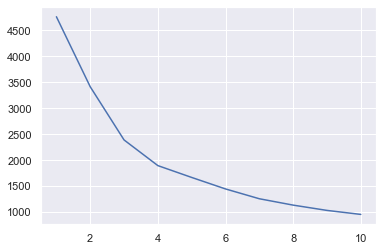

In [61]:
plt.plot(range(1,11), wss);

In [77]:
k_means = KMeans(n_clusters = 3)
k_means.fit(scaled_leaf)
labels = k_means.labels_
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 1, 2,
       2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,

In [78]:
leaf["Clus_kmeans"] = labels
leaf.head(5)

,Eccentricity,Aspect Ratio,Elongation,Solidity,Stochastic Convexity,Isoperimetric Factor,Maximal Indentation Depth,Lobedness,Average Intensity,Average Contrast,Smoothness,Third moment,Uniformity,Entropy,Clus_kmeans,sil_width
0,0.72694,1.4742,0.32396,0.98535,1.00000,0.83592,0.004657,0.003947,0.047790,0.127950,0.016108,0.005232,0.000275,1.17560,0,0.410894
1,0.74173,1.5257,0.36116,0.98152,0.99825,0.79867,0.005242,0.005002,0.024160,0.090476,0.008119,0.002708,0.000075,0.69659,0,0.618861
2,0.76722,1.5725,0.38998,0.97755,1.00000,0.80812,0.007457,0.010121,0.011897,0.057445,0.003289,0.000921,0.000038,0.44348,0,0.579356
3,0.73797,1.4597,0.35376,0.97566,1.00000,0.81697,0.006877,0.008607,0.015950,0.065491,0.004271,0.001154,0.000066,0.58785,0,0.611058
4,0.82301,1.7707,0.44462,0.97698,1.00000,0.75493,0.007428,0.010042,0.007938,0.045339,0.002051,0.000560,0.000023,0.34214,0,0.518717


In [79]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [80]:
silhouette_score(scaled_leaf,labels)

0.32131573578829453

In [81]:
sil_width = silhouette_samples(scaled_leaf,labels)
sil_width

array([ 3.09652719e-01,  5.30816855e-01,  5.47833273e-01,  5.41172272e-01,
        5.51728078e-01,  5.26823652e-01,  5.58248149e-01,  5.34993930e-01,
        5.46085839e-01,  5.37518966e-01,  5.18395175e-01,  5.57406322e-01,
        4.86818492e-01,  5.41659582e-01,  5.23194743e-01,  5.27973917e-01,
        5.31183367e-01,  5.05476203e-01,  5.60537748e-01,  5.25999877e-01,
        4.92949098e-01,  6.98248756e-02,  3.91388224e-01,  4.93421106e-01,
        3.25721484e-02,  4.47832247e-01,  2.48468691e-02,  2.24014559e-02,
        1.10738261e-01,  4.00735958e-01,  1.08341644e-01,  1.36406562e-01,
        1.34612506e-01,  3.00490238e-01,  4.06397545e-01,  4.39728885e-01,
        5.06600741e-01,  5.38912971e-01,  3.87789020e-01,  2.33230560e-01,
        9.15663026e-02,  7.45182745e-03,  1.50938072e-01,  3.46221983e-01,
        7.67439571e-02,  1.69944798e-01,  1.78509940e-01,  2.55674514e-02,
        1.65315313e-01,  9.09113950e-02,  6.01865415e-02,  1.20141541e-01,
        4.47025694e-01,  

In [82]:
leaf["sil_width"] = sil_width
leaf.head(5)

,Eccentricity,Aspect Ratio,Elongation,Solidity,Stochastic Convexity,Isoperimetric Factor,Maximal Indentation Depth,Lobedness,Average Intensity,Average Contrast,Smoothness,Third moment,Uniformity,Entropy,Clus_kmeans,sil_width
0,0.72694,1.4742,0.32396,0.98535,1.00000,0.83592,0.004657,0.003947,0.047790,0.127950,0.016108,0.005232,0.000275,1.17560,0,0.309653
1,0.74173,1.5257,0.36116,0.98152,0.99825,0.79867,0.005242,0.005002,0.024160,0.090476,0.008119,0.002708,0.000075,0.69659,0,0.530817
2,0.76722,1.5725,0.38998,0.97755,1.00000,0.80812,0.007457,0.010121,0.011897,0.057445,0.003289,0.000921,0.000038,0.44348,0,0.547833
3,0.73797,1.4597,0.35376,0.97566,1.00000,0.81697,0.006877,0.008607,0.015950,0.065491,0.004271,0.001154,0.000066,0.58785,0,0.541172
4,0.82301,1.7707,0.44462,0.97698,1.00000,0.75493,0.007428,0.010042,0.007938,0.045339,0.002051,0.000560,0.000023,0.34214,0,0.551728


In [83]:
silhouette_samples(scaled_leaf,labels).min()

-0.023024981590489334

In [84]:
leaf.to_csv('lf.csv')